# Intervalos de confiança.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as stats

1. **Intervalos de Confiança:**

In [5]:
# Nome do arquivo CSV a ser lido
nome_arquivo = "..\\data\\pedidos_0.csv"

# Leitura do arquivo CSV usando pandas
dados = pd.read_csv(nome_arquivo)
dados = dados[dados["vr_desconto"] > 0]
dados['cd_estoque'] = dados['cd_estoque'].astype(int)

print(dados)

      cd_pedido  cd_estoque  cd_vendedor  cd_cliente  cd_loja  vr_desconto
0             1           1            0           0        0       3.0882
1             2      800001            0           0        0       5.1470
2             3           2            0           0        0       3.8636
3             4      800002            0           0        0       1.9318
4             5           3            0           0        0       2.1452
...         ...         ...          ...         ...      ...          ...
9995       9996      804998            0           0      249       4.9844
9996       9997        4999            0           0      249       1.4265
9997       9998      804999            0           0      249       5.7060
9998       9999        5000            0           0      249       1.3976
9999      10000      805000            0           0      249       1.3976

[8336 rows x 6 columns]


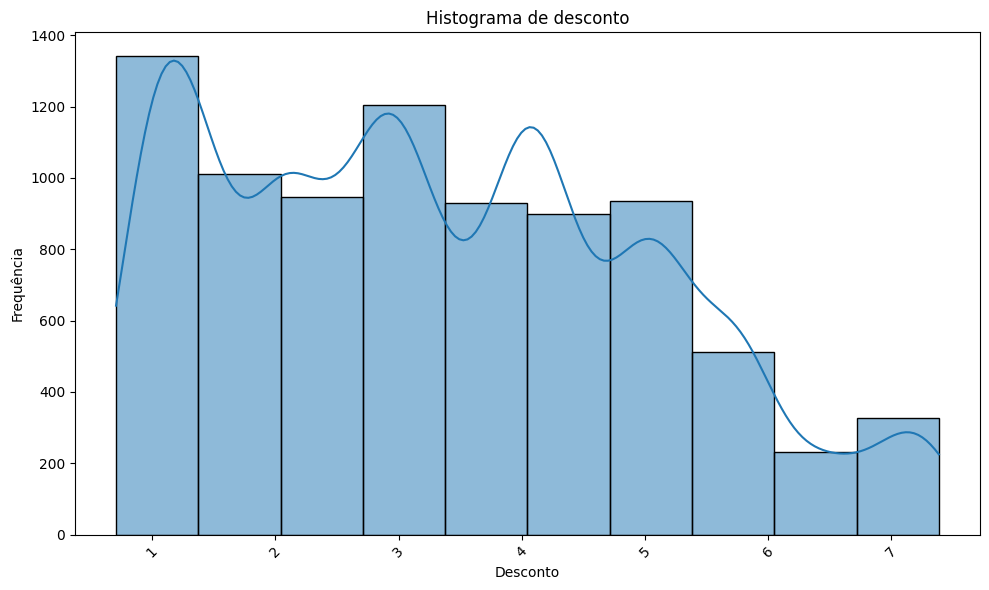

In [6]:
# Criar o histograma com Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=dados, x='vr_desconto', bins=10, kde=True)
plt.title('Histograma de desconto')
plt.xlabel('Desconto')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Calculando as estatísticas
media = dados['vr_desconto'].mean()
mediana = dados['vr_desconto'].median()
min = dados['vr_desconto'].min()
max = dados['vr_desconto'].max()
moda = dados['vr_desconto'].mode()[0]  # Pode haver múltiplas modas, portanto, pegamos apenas a primeira
desvio_padrao = dados['vr_desconto'].std()
total_rows = dados.size

# Exibindo as estatísticas
print("Minímo dos desconto:", min)
print("Média dos desconto:", media)
print("Mediana dos desconto:", mediana)
print("Máximo dos desconto:", max)
print("Moda dos desconto:", moda)
print("Desvio padrão dos desconto:", desvio_padrao)
print("Totao de elementos da amostra:", total_rows)

Minímo dos desconto: 0.7067
Média dos desconto: 3.345921473128599
Mediana dos desconto: 3.0882
Máximo dos desconto: 7.3845
Moda dos desconto: 1.2954
Desvio padrão dos desconto: 1.7329655141160007
Totao de elementos da amostra: 50016


In [8]:
# Quantidade maxima de registro a ser analisado
perc_dados = 0.90

In [9]:
# Calculando scale a ser aplicada para o intervalo de confiança
s = (media - moda) / desvio_padrao


In [10]:
# Calculando intervalo de confiança para a média com 90% de confiança
intervalo_confianca = stats.norm.interval(confidence=perc_dados, loc=media, scale=s)

min_inter = intervalo_confianca[0]
max_inter = intervalo_confianca[1]

print(f"Intervalo de Confiança de ({(perc_dados * 100)}) é: {min_inter} até {max_inter}")

Intervalo de Confiança de (90.0) é: 1.3996578834933784 até 5.292185062763819


In [11]:
df_intervalo = dados.loc[(dados["vr_desconto"]>=min_inter) & (dados["vr_desconto"]<=max_inter)]
df_intervalo.size

34032

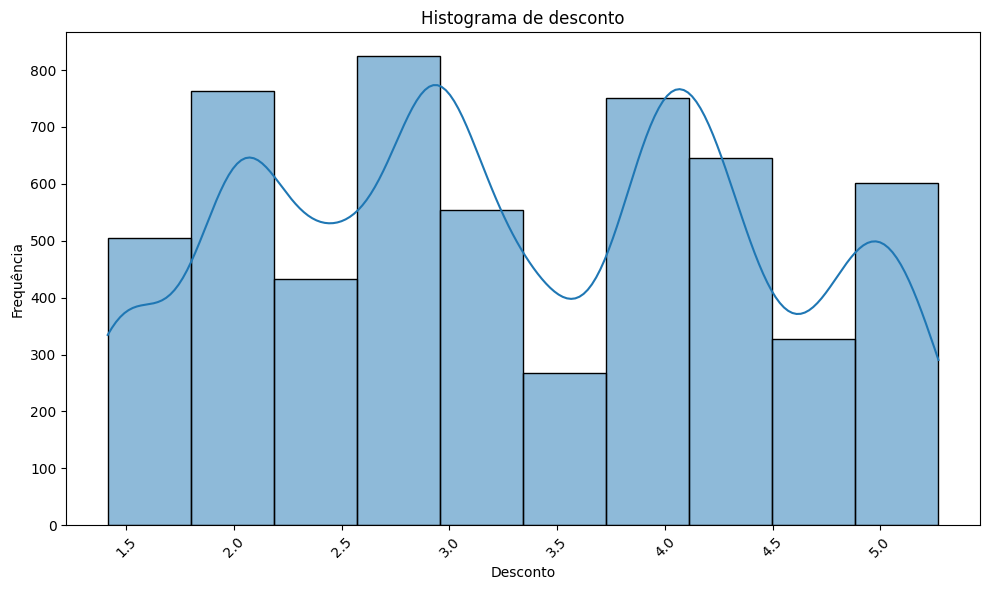

In [12]:
# Criar o histograma com Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_intervalo, x='vr_desconto', bins=10, kde=True)
plt.title('Histograma de desconto')
plt.xlabel('Desconto')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Calculando as estatísticas
media = df_intervalo['vr_desconto'].mean()
mediana = df_intervalo['vr_desconto'].median()
min = df_intervalo['vr_desconto'].min()
max = df_intervalo['vr_desconto'].max()
moda = df_intervalo['vr_desconto'].mode()[0]  # Pode haver múltiplas modas, portanto, pegamos apenas a primeira
desvio_padrao = df_intervalo['vr_desconto'].std()

# Exibindo as estatísticas
print("Minímo dos desconto:", min)
print("Média dos desconto:", media)
print("Mediana dos desconto:", mediana)
print("Máximo dos desconto:", max)
print("Moda dos desconto:", moda)
print("Desvio padrão dos desconto:", desvio_padrao)

Minímo dos desconto: 1.4134
Média dos desconto: 3.292481911142454
Mediana dos desconto: 3.1623
Máximo dos desconto: 5.2705
Moda dos desconto: 1.9318
Desvio padrão dos desconto: 1.1048260208562932
